In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1
    return (x,y)

def sample(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1 + np.random.randn(x.size)*0.5
    return (x,y)

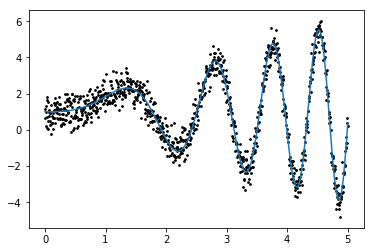

In [13]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
X, y = sample(1000)
plt.scatter(X, y, s=3, c="black")
plt.show()

In [14]:
X.shape, y.shape

((1000,), (1000,))

In [15]:
# sklearn으로 regression하기 위해 2-dim으로 reshape
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X.shape, y.shape

((1000, 1), (1000, 1))

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

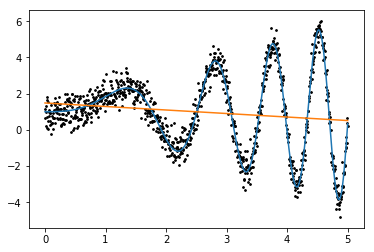

In [17]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")   # plot 그리기 위해 1-dim으로 flatten
plt.plot(X.flatten(), lr.predict(X).flatten())
plt.show()

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)   # 2-degree poly로 변환
X_poly = poly_features.fit_transform(X)
X_poly[:10]   # x_0, x_1, x_1^2

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04],
       [1.00000000e+00, 2.00200200e-02, 4.00801202e-04],
       [1.00000000e+00, 2.50250250e-02, 6.26251878e-04],
       [1.00000000e+00, 3.00300300e-02, 9.01802704e-04],
       [1.00000000e+00, 3.50350350e-02, 1.22745368e-03],
       [1.00000000e+00, 4.00400400e-02, 1.60320481e-03],
       [1.00000000e+00, 4.50450450e-02, 2.02905608e-03]])

In [19]:
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

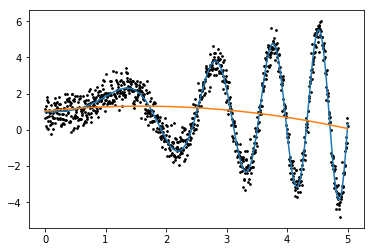

In [20]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [21]:
poly_features = PolynomialFeatures(degree=9)
X_poly = poly_features.fit_transform(X)
X_poly[:3]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05, 1.25375751e-07,
        6.27506263e-10, 3.14067198e-12, 1.57190790e-14, 7.86740691e-17,
        3.93764110e-19, 1.97079134e-21],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04, 1.00300601e-06,
        1.00401002e-08, 1.00501504e-10, 1.00602106e-12, 1.00702808e-14,
        1.00803612e-16, 1.00904517e-18]])

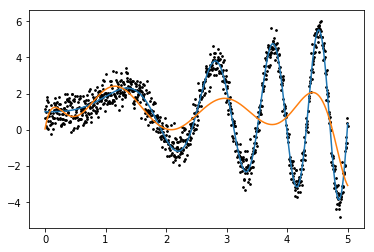

In [22]:
lr = LinearRegression()
lr.fit(X_poly, y)
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [23]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [25]:
poly_range = list(range(10, 50))
rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

for poly_value in poly_range:   # 10차 ~ 49차 poly를 fit해서 비교하기 위해
    poly_features = PolynomialFeatures(degree=poly_value)
    X_poly = poly_features.fit_transform(X)
    lr = LinearRegression(fit_intercept=False)
    lr.fit(X_poly, y)
    
    rmse_lr_list.append(rmse(lr.predict(X_poly), y))

    lasso = Lasso(fit_intercept=False)
    lasso.fit(X_poly, y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly), y))
    
    ridge = Ridge(fit_intercept=False)
    ridge.fit(X_poly, y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly), y))

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.855329e-18
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause preci

In [27]:
import pandas as pd
data = {"poly_range":poly_range, "lr_rmse":rmse_lr_list, 
        "lasso_rmse":rmse_lasso_list, "ridge_rmse":rmse_ridge_list}
df = pd.DataFrame(data).set_index("poly_range")
df

,lr_rmse,lasso_rmse,ridge_rmse
poly_range,,,
10,1.874962,2.275481,1.900626
11,1.866431,2.276557,1.881093
12,1.594241,2.276729,1.879788
13,1.330097,2.276033,1.851528
14,1.317301,2.274772,1.689094
15,0.910795,2.273354,1.529209
16,0.710552,2.272042,1.469526
17,0.678777,2.270960,1.460494
18,0.705844,2.270161,0.869599


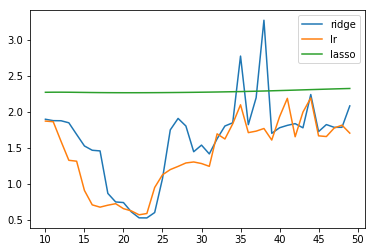

In [28]:
plt.plot(poly_range, df["ridge_rmse"], label="ridge")
plt.plot(poly_range, df["lr_rmse"], label="lr")
plt.plot(poly_range, df["lasso_rmse"], label="lasso")
plt.legend()
plt.show()

In [29]:
df.min()

lr_rmse       0.572308
lasso_rmse    2.269289
ridge_rmse    0.529101
dtype: float64

In [30]:
df["ridge_rmse"].sort_values().head()

poly_range
23    0.529101
22    0.529940
24    0.603864
21    0.614196
20    0.742624
Name: ridge_rmse, dtype: float64

In [31]:
poly_features = PolynomialFeatures(degree=23)
X_poly = poly_features.fit_transform(X)
ridge = Ridge(fit_intercept=False)
ridge.fit(X_poly, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

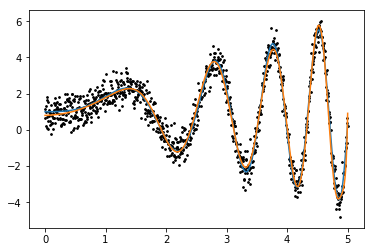

In [32]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), ridge.predict(X_poly).flatten())
plt.show()

# Exercises problem

data from - https://onlinecourses.science.psu.edu/stat501/node/325

In [54]:
df = pd.read_csv("data/yield.csv",sep="\t")
df.head()

,i,Temp,Yield
0,1,50,3.3
1,2,50,2.8
2,3,50,2.9
3,4,70,2.3
4,5,70,2.6


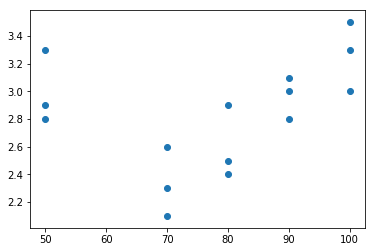

In [55]:
plt.scatter(df["Temp"], df["Yield"])
plt.show()

In [56]:
X = df["Temp"]
y = df["Yield"]
X.shape, y.shape

((15,), (15,))

In [57]:
X = X.values.reshape(-1,1)   # Series 객체는 바로 reshape 불가 => numpy.ndarray로 변환 후 reshape
y = y.values.reshape(-1,1)
X.shape, y.shape

((15, 1), (15, 1))

In [58]:
poly_range = list(range(2, 10))
rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

for poly_value in poly_range:   # 2차 ~ 10차 poly를 fit해서 비교하기 위해
    poly_features = PolynomialFeatures(degree=poly_value)
    X_poly = poly_features.fit_transform(X)
    lr = LinearRegression(fit_intercept=False)
    lr.fit(X_poly, y)
    
    rmse_lr_list.append(rmse(lr.predict(X_poly), y))

    lasso = Lasso(fit_intercept=False)
    lasso.fit(X_poly, y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly), y))
    
    ridge = Ridge(fit_intercept=False)
    ridge.fit(X_poly, y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly), y))

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.904078e-17
  overwrite_a=True).T
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause preci

In [59]:
data = {"poly_range":poly_range, "lr_rmse":rmse_lr_list, 
        "lasso_rmse":rmse_lasso_list, "ridge_rmse":rmse_ridge_list}
result = pd.DataFrame(data).set_index("poly_range")
result

,lr_rmse,lasso_rmse,ridge_rmse
poly_range,,,
2,0.218597,0.481034,0.442254
3,0.196676,0.480895,0.248386
4,0.196638,0.460220,0.202434
5,0.196638,0.464953,0.200367
6,0.196638,0.468788,0.196639
7,0.196638,0.469746,0.196638
8,0.196638,0.469214,0.196638
9,0.196638,0.467693,0.196638


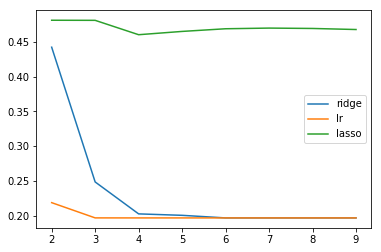

In [60]:
plt.plot(poly_range, result["ridge_rmse"], label="ridge")
plt.plot(poly_range, result["lr_rmse"], label="lr")
plt.plot(poly_range, result["lasso_rmse"], label="lasso")
plt.legend()
plt.show()

In [61]:
result.min()

lr_rmse       0.196638
lasso_rmse    0.460220
ridge_rmse    0.196638
dtype: float64

In [62]:
result["lr_rmse"].sort_values().head()

poly_range
8    0.196638
9    0.196638
4    0.196638
7    0.196638
6    0.196638
Name: lr_rmse, dtype: float64

In [63]:
poly_features = PolynomialFeatures(degree=8)
X_poly = poly_features.fit_transform(X)
lr = LinearRegression(fit_intercept=False)
lr.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

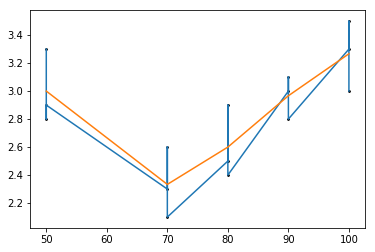

In [64]:
plt.plot(df["Temp"], df["Yield"])
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()